### О чем курс и для кого

#Данный курс посвящен применению ML в бизнесе. Курс создан с целью ознакомления с прикладными задачами, в которых машинное обучение хорошо работает и приносит пользу в виде увеличения финансовых показателей либо улучшения (автоматизации) процессов в компании. В рамках курса будет рассмотрено несколько прикладных задач, таких как:

- retargeting
- lookalike
- задача uplift-моделирования
- моделирование оттока. 

Также будет затронут вопрос формулирования гипотез, презентации результатов, интеграции и АБ-тестирования ML-моделей. 

Итогом курса будет разработка Rest API сервиса, с которым можно взаимодействовать и получать прогнозы для новых данных.#

#### Важные уточнения

Моделирование - лишь малая часть большого процесса по решению реальной задачи

Более того, перед тем как внедрять ML, стоит ответить на ряд вопросов:

- какую проблему решаем, и для кого?
- как проблема решается сейчас? Чем нам поможет ML?

Как вы понимаете, ответы нетривиальны обычно.

Пример схемы, как может выглядеть решение на базе машинного обучения

![ab_split](tdsp-lifecycle2.png "TDSP")

Существует проблема общения бизнеса и DS (говорят на каком-то своем языке)

## Вебинар 1. Введение. Data-driven подход на примере задачи маршрутизации заявок в helpdesk

### Введение и примеры задач, которые мы рассмотрим в рамках курса

Машинное обучение в бизнесе:
- ориентированность на улучшение показателей бизнеса
- сложно оценить результат заранее
- долго по времени
- планирование внедрения

Примеры задач (часть из них мы рассмотрим их в рамках курса):
- маршрутизация заявок в helpdesk
- сегментирование аудитории
- прогнозирование оттока
- персональные рекомендации
- uplift-моделирование
- etc

Также мы коснемся вопросов:

- связи DS-метрик и бизнес-метрик
- онлайн-тестирования (АБ-тестирование)
- интерпретируемости обученных моделей
- "продуктивизации" моделей и пайплайнов

### Пример 1. Маршрутизация заявок в службе технической поддержки

Схема

![ab_split](helpdesk1.png "Helpdesk 1")

Ссылка - http://www.it-rw.ru/helpdesk2.html

Проблема - много ручной работы по распределению заявок между командами.

Возможное решение - передать управление процессом распределения заявок ML-модели.

На схеме выше мы встраиваем модель параллельно с администратором, которая также будет разбирать заявки автоматически. 

С чего же нам начать?

#### Как это может выглядеть на практике (с вариациями)

Проблема -> Анализ -> Продуктовая гипотеза -> Метрики и критерии приемки -> ML решение -> AB-тестирование -> Оценка результатов -> Интеграция с другими командами

### 1. Проблема и почему ее стоит решать (игрушечный пример)

Сейчас все заявки разбираются вручную операторами первой линии и на это уходит N человекочасов в день. Стоимость одного человекочаса - K рублей. Если хотя бы часть (минимум x процентов) заявок будет распределяться автоматически, то это сэкономит нам N*x*k рублей в целом для компании. Более того, часть заявок не успевают распределять, в результате чего компания получает недовольных клиентов.

* на практике часто несколько сложнее обосновать экономическую составляющую, но это почти всегда можно сделать

### 2. Продуктовая гипотеза

"Базируясь на предположении, что модель машинного обучения сможет классифицировать заявки автоматически по их текстовому содержанию и метаинформации, <b>не превышая ошибку в 10%</b>, мы предполагаем, что реализовав такую систему распределения заявок, основанную на ML, мы сможем заметно снизить нагрузку на людей, которые распределяют заявки вручную. Мы увидим это по <b>увеличению количества заявок</b> , <b>корректно</b> обрабатываемых первой линией ТП и можем измерить ее с помощью метрики <b>доля заявок, корректно переведенных на второй уровень ТП</b>. Мы полагаем, что изменение приведет к хорошим результатам для компании, т.к значимо снизит нагрузку на сотрудников ТП и уменьшит долю заявок, которые не успевают обрабатываться"

Метрика1 (основная) - ctr (доля заявок, обработанных ML-моделью)

* ML-модель может ошибаться и некорректно классифицировать заявки, но она не должна это делать чаще, чем в 10% случаев. Любая некорректно классифицированная заявка возвращается обратно в очередь, при этом тратится время дополнительно уже специалистов второго уровня ТП

Откуда взялись 10процентов? - это средняя ошибка человека первой линии ТП. Мы хотим, чтобы наша модель ошибалась не чаще и при этом сама парсила содержимое заявок и принимала одно из 2 решений: 

- передать на второй уровень ТП (выполнить маршрутизацию)
- вернуть заявку в общую очередь (пометить, что недостаточно уверена и пусть уже далее заявка разбирается вручную)

### 3. ML решение (общий случай)

1. Формулировка задачи и выбор метрики (DS)
2. Сбор данных и подготовка датасета
3. Построение модели (обучение)
4. Оборачивание всего этого в пайплайн обучения (для того, чтобы использовать в production)
5. Мониторинг качества, логгирование
6. Оценка результатов и проведение экспериментов

### 4. AB-тестирование (планирование)

Как АБ-тестирование выглядит в общем случае, когда у нас 2 варианта

![ab_split](ab1.png "AB split")

Разбиваем все наши заявки на 2 группы (при этом мы не все заявки берем, а только некоторую часть - об этом позже): 

- A: заявки разбираются вручную как и ранее
- B: в обработке заявок участвует модель

Далее сравниваем с помощью статистического теста долю правильно обработанных и переданных на второй уровень ТП заявок. 

Гипотеза 0 - разницы в конверсии нет и модель никак не увеличивает долю таких заявок.

Гипотеза 1 - модель статистически значимо увеличит показатель конверсии. 

Т.к наша метрика - бинарная (конверсия), то нам легко будет выбрать критерий и подтвердить/опровергнуть нулевую гипотезу.

### Как разбить аудиторию?

- случайно
- случайно со стратификацией
- отфильтровать по сегментам

Случайно

![random_sampling](sampling_random.png "sampling_random")

Stratified Random Sampling

![stratified_sampling](sampling_stratified.png "stratified_sampling")

Теперь важный вопрос: какая доля заявок будет участвовать в эксперименте? Ответ нетривиален.

Нам нужно выбрать столько, чтобы нам было достаточно для получения статистически значимых выводов, при том, что сам эксперимент можно провести за относительно небольшое время. 

### Как понять, сколько нам "достаточно"?

Рассмотрим пример результатов АБ-теста

![ab_split](ab2.png "AB results example")

Все подробно разберем на занятии 8. 

Полезные ссылки:

https://geekbrains.ru/events/2128


### 5. Оценка результатов и вопрос интеграции

Если будет получена статзначимость и мы успешно пройдем этап АБ-тестирования, то можно будет перейти к этапу интеграции нашего решения в компании. 

Обычно для доступа к ML-модели поднимается web API, с которым можно настроить интеграцию. Это будет нашим финальным проектом. 

В рамках курса каждый этап мы будем разбирать отдельно. 

### ПЕРЕРЫВ (до 20:50 МСК)

## Вернемся к практике

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("support_data.csv").drop('Unnamed: 0', 1)
df.head(3)

,Title,Resolution,class,category
0,Need Ethernet access,Please connect the LAN cable to the red port o...,41,1
1,Create new account and share the username and ...,"Go to URL : accountsetup.com, Enter personal d...",35,0
2,FW: Myspace Login Issue-- Ania,"Go to URL : password.reset.com, Enter you logi...",36,0


Посмотрим на распределение классов:

In [3]:
df['category'].value_counts()

0    125
1     25
Name: category, dtype: int64

В качестве поля для генерации признаков будем использовать Title. Сразу же будем работать с использованием sklearn pipeline

### Что такое pipeline?

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

![ab_split](pipeline.png "Pipeline")

Еще схема (пример)

![ab_split](pipeline2.png "Pipeline2")

In [4]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df, df['category'], random_state=0)

In [13]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

pipeline = Pipeline([('title_selector', FeatureSelector(column='Title')), 
                     ('title_tfidf', TfidfVectorizer( )), 
                     ('clf', LogisticRegression())], verbose = True)

Что есть что

- FeatureSelector - выбирает столбец Title и передает его значения на следующий шаг
- TfidfVectorizer - векторизует текст (поле Title)
- LogisticRegression - наш бинарный классификатор, который обучается на результатах предыдущих шагов и разметке (их мы передадим уже при обучении)

### tfidf (если кто-то забыл)

https://ru.wikipedia.org/wiki/TF-IDF

![ab_split](tfidf.png "TFIDF")

In [14]:
#обучим наш пайплайн
pipeline.fit(X_train, y_train)

[Pipeline] .... (step 1 of 3) Processing title_selector, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing title_tfidf, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing clf, total=   0.0s


Pipeline(memory=None,
         steps=[('title_selector', FeatureSelector(column='Title')),
                ('title_tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=N...
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                   

In [21]:
#наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)[:5, :]
preds[:10]

array([[0.91081012, 0.08918988],
       [0.92431379, 0.07568621],
       [0.76492273, 0.23507727],
       [0.83646514, 0.16353486],
       [0.76874921, 0.23125079]])

Мы получили вероятности (кстати, не факт - нужно проверять), но давайте посмотрим на метрики

Также нам нужно от вероятностей перейти к меткам классов. Для этого нужно подобрать порог, после которого мы считаем, что объект можно отнести к классу 1 (если вероятность больше порога - размечаем объект как класс 1, если нет - класс 0)

In [16]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

### Рассчитаем Precision, Recall, F_score

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

In [18]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.214648, F-Score=0.960, Precision=0.923, Recall=1.000


Как это интерпретировать?

Допустим, что у нас в тесте 1000 заявок. Из них класс 1 - 200

Мы обучили модель, сделали прогноз, посчитали порог и выше этого порога у нас 100 заявок.


При этом оказывается, что среди этих 100 заявок - 80 действительно класс 1. 

TP = 80, FP = 20, TN = 780, FN = 120

Precision = TP/(TP+FP) = 80/(80+20) = 0.8

Recall = TP/(TP+FN) = 80/(80+120) = 0.4

#### Вопрос 1: объясните своими словами смысл метрик Precison, Recall *
1. Какова их взаимосвязь и как с ними связан порог вероятности? 
2. Можно ли подобрать порог так, что recall будет равен 1? Что при этом будет с precision
3. Аналогичный вопрос про precision



* Можно вернуться к этому вопросу после освоения материала из следующего раздела

Ваш ответ здесь:

### Вспоминаем базовые DS-метрики классификации

Матрица ошибок классификации

![confusion_matrix](error_matrix.png "confusion matrix")

Отрисуем матрицу ошибок для нашего примера

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[25  1]
 [ 2 10]]


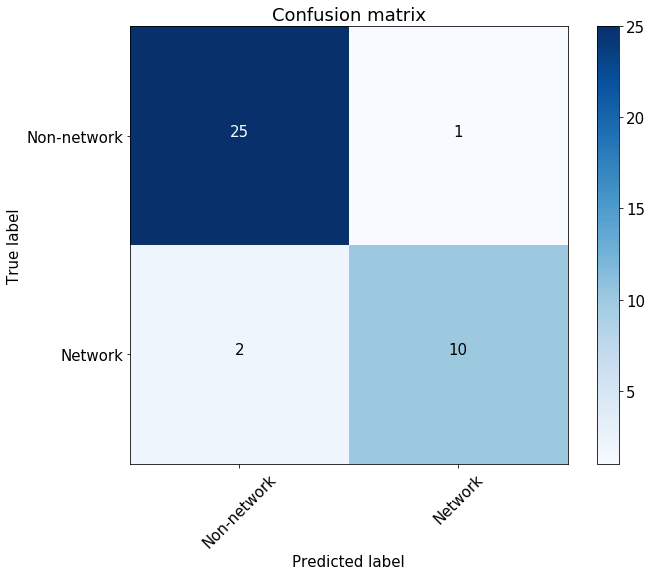

In [12]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-network', 'Network'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

доля неверно классифицированных объектов класса 1 (Network) - 0.091 (1/11). Это меньше заявленных 0.1 (в гипотезе). Для класса 0 ошибка - 0.07. 

Общая же ошибка получилась 0.079.

#### Вопрос 2: Как вы думаете, что бы нам пришлось делать, если бы модель ошибалась бы чаще?

Ваш ответ:


#### Примечание

Конечно же наш пример выше - игрушечный и в реальности такого набора данных будет вряд ли достаточно для каких-либо выводов. Однако такая ситуация с нехваткой данных может быть, но это другая проблема. 

### Выводы по этапу ML-решения

Итак, что же мы сделали на данный момент:

1. обдумали проблему 
2. сформулировали так называемую продуктовую гипотезу, в которой определили:
   - какую именно задачу мы решаем (классификация заявок по содержимому)
   - какая у нас метрика качества (доля верно классифицированных заявок)
   - условия (что ошибка не превышает 10 процентов)
3. собрали датасет и обучили модель
4. проинтерпретировали результаты моделирования и пришли к выводу, что с такой модели можно начать тестирование

Что мы еще <b>не</b> сделали:
1. НЕ спланировали эксперимент (аб-тестирование)
2. НЕ продумали интеграцию

Но мы ко всему этому придем постепенно в рамках курса.

### Что стоит знать для комфортного прохождения курса (минимум)

1. "базовый" ML
2. основы статистики и теории вероятностей
3. python на базовом уровне

#### Более детально:

Необходимые навыки и знания для успешного прохождения курса:
1. Машинное обучение на среднем уровне (понятна разница между задачами регрессии и классификации, знаете что такое кроссвалидация, понимаете метрики качества вроде rocauc, recall, logloss, etc). 
2. Python. Здесь понадобится не только знание синтаксиса языка, но и желательно, навыки работы с прикладными пакетами вроде sklearn, pandas, numpy, matplotlib (на уроках конечно же будем все разбирать, но будет намного легче, если есть опыт)
3. Python. Навыки работы со средствами установки пакетов: pip, Conda. А также (желательно) умение работать с virtualenv и понимание в целом про то как работать с разными окружениями python на одном сервере.
4. ООП. Умение не просто писать код на питоне в «процедурном» стиле, а способность завернуть все это в удобные классы и функции будет очень полезным.

Ссылки:

1. https://scikit-learn.org/stable/user_guide.html
2. https://pandas.pydata.org/docs/user_guide/index.html
3. https://docs.conda.io/en/latest/

### По инструментам *

1. IDE - pycharm
2. github (tutorial - https://guides.github.com/activities/hello-world/)
3. jupyter notebook
4. virtualenv/pip/conda (последнее - проще всего установить и настроить)

Ссылки:

1. https://virtualenv.pypa.io/en/latest/

*- здесь полная свобода выбора

### Домашнее задание 1 (теоретическая часть)

Здесь предлагается то, что полезно знать и уметь для успешного прохождения курса (да и без курса полезно)

ML: 
1. вспомнить базовые алгоритмы машинного обучения: линейные модели, "деревянные"
2. повторить метрики качества в задачах классификации/регрессии. (например, понимать что такое roc auc и как его интерпретировать и т.д)
3. вспомнить из каких этапов состоит решение ML-задачи и уметь объяснить каждый из этапов: подготовка данных, feature engineering, modelling, evaluation, etc
4. кроссвалидация

Теория вероятностей и статистика:
1. Генеральная совокупность и выборка
2. Базовые статистики: среднее, медиана, дисперсия
3. Распределения: нормальное, бернулли, пуассона и т.д
4. Нулевая и альтернативная гипотезы
5. статистические тесты

Python:
1. структуры данных: set, list, dict, tuple, etc
2. циклы, условия
3. numpy/pandas/sklearn

### Полезные ссылки

1. метрики качества - https://habr.com/ru/company/ods/blog/328372/
2. roc auc - https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
3. Основы статистики: просто о сложных формулах - https://habr.com/ru/company/stepic/blog/250527/
4. Теория вероятностей в работе программиста (вебинар) - https://geekbrains.ru/events/129
5. Туториал по машинному обучению (sklearn) - https://scikit-learn.org/stable/tutorial/basic/tutorial.html
6. Туториал по github - https://guides.github.com/activities/hello-world/

### Домашнее задание 2 (практическая часть)

Ноутбук HW1.ipynb (есть в директории занятия)


Нужные пакеты и библиотеки:
- plotly
- imblearn
- yellowbrick